<a href="https://colab.research.google.com/github/GunduSriBhanu/Computer-vision-on-pdf/blob/main/Table_Extraction_Yolo_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing tesseract in system
!sudo apt install tesseract-ocr

# Installing required dependencies
!pip install pytesseract transformers ultralyticsplus==0.0.23 ultralytics==8.0.21

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (9,792 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pdf2image

In [ ]:
!apt-get install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 0s (581 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121960 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
from pdf2image import convert_from_path
import os


# Path to your PDF file
pdf_path = '/content/c-wq-dealer.pdf'

# Convert PDF to a list of PIL Image objects
images = convert_from_path(pdf_path)

# Create a folder to save images
output_folder = 'images'
os.makedirs(output_folder, exist_ok=True)

# Convert PDF to a list of PIL Image objects
images = convert_from_path(pdf_path)

# Save each page as an image file in the output folder
for i, image in enumerate(images):
    image_path = os.path.join(output_folder, f'page_{i + 1}.jpg')
    image.save(image_path, 'JPEG')
    #print(f'Image saved: {image_path}')



In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pytesseract
from pytesseract import Output

from ultralyticsplus import YOLO, render_result
from PIL import Image

In [ ]:
#image = '/content/page_107.jpg'

#img = Image.open(image)
#img
# Iterate over all files in the folder
for filename in os.listdir(output_folder):
    # Check if the file is an image file
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        # Construct the full path to the image file
        image_path = os.path.join(output_folder, filename)

        # Open the image
        img = Image.open(image_path)

        # Perform operations on the image (e.g., display, process, etc.)
        # For example, you can display the image
        img#.show()

In [ ]:
# load model
model = YOLO('keremberke/yolov8m-table-extraction')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
##model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/52.0M [00:00<?, ?B/s]

In [ ]:
# perform inference
#results = model.predict(img)


output_folder = 'images'
cropped_folder = 'cropped_images'
os.makedirs(cropped_folder, exist_ok=True)
results = []
render = []
# Check if the directory exists
if not os.path.exists(output_folder):
    raise FileNotFoundError(f'The directory {output_folder} does not exist')

# Loop through each file in the directory
for img_name in os.listdir(output_folder):
    img_path = os.path.join(output_folder, img_name)

    # Check if the file exists
    if not os.path.isfile(img_path):
        raise FileNotFoundError(f'The file {img_path} does not exist')

    # Assuming model.predict expects the full path
    result = model.predict(img_path)
    results.append(result)
    #print(len(result))
    render.append(render_result(model=model, image=img_path, result=result[0]))
     # Check if there are any detected boxes
    if len(result[0].boxes) > 0:
        # Extract the first bounding box (assuming the format is correct)
        for i in range(len(result[0].boxes.data.numpy())):
            x1, y1, x2, y2, _, _ = tuple(int(item) for item in result[0].boxes.data.numpy()[i])
            #print(len(result[0].boxes.data.numpy()))
            # Load the image
            img = np.array(Image.open(img_path))

            # Cropping
            cropped_image = img[y1:y2, x1:x2]
            cropped_image = Image.fromarray(cropped_image)

            # Save the cropped image
            # Extract the file extension
            file_root, file_ext = os.path.splitext(img_name)

            # Save the cropped image with a new name
            cropped_image.save(os.path.join(cropped_folder, f'{file_root}_{i+1}{file_ext}'))
    else:
        print(f'No objects detected in {img_name}. Skipping cropping.')

print(render)




Ultralytics YOLOv8.0.21 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/images/page_235.jpg: 640x512 1 borderless, 1226.7ms
Speed: 1.2ms pre-process, 1226.7ms inference, 27.8ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_171.jpg: 640x512 5 bordereds, 1 borderless, 1079.1ms
Speed: 1.1ms pre-process, 1079.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_33.jpg: 640x512 1 bordered, 1 borderless, 1064.5ms
Speed: 1.0ms pre-process, 1064.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_78.jpg: 640x512 2 bordereds, 1464.5ms
Speed: 1.2ms pre-process, 1464.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_181.jpg: 640x512 1 bordered, 1 borderless, 1748.5ms
Speed: 1.1ms pre-process, 1748.5ms inference, 1.3ms postprocess pe

No objects detected in page_108.jpg. Skipping cropping.


image 1/1 /content/images/page_149.jpg: 640x512 1 bordered, 2 borderlesss, 1809.0ms
Speed: 1.2ms pre-process, 1809.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_173.jpg: 640x512 1 bordered, 1110.7ms
Speed: 1.0ms pre-process, 1110.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_58.jpg: 640x512 1 borderless, 1097.6ms
Speed: 1.1ms pre-process, 1097.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_223.jpg: 640x512 3 borderlesss, 1097.0ms
Speed: 1.1ms pre-process, 1097.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_84.jpg: 640x512 3 bordereds, 1075.5ms
Speed: 1.1ms pre-process, 1075.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_153.jpg: 640x512 1 bordered, 1 borderless, 1141.7ms
Speed: 1.2ms pre-process, 1141.7ms inference, 0.9ms p

No objects detected in page_19.jpg. Skipping cropping.


image 1/1 /content/images/page_174.jpg: 640x512 1 borderless, 1692.2ms
Speed: 8.2ms pre-process, 1692.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_140.jpg: 640x512 1 bordered, 2 borderlesss, 1095.2ms
Speed: 1.2ms pre-process, 1095.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_43.jpg: 640x512 1 borderless, 1102.8ms
Speed: 1.1ms pre-process, 1102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_55.jpg: 640x512 1105.9ms
Speed: 1.4ms pre-process, 1105.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_55.jpg. Skipping cropping.


image 1/1 /content/images/page_224.jpg: 640x512 1 borderless, 1104.7ms
Speed: 1.2ms pre-process, 1104.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_220.jpg: 640x512 1117.1ms
Speed: 1.2ms pre-process, 1117.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_220.jpg. Skipping cropping.


image 1/1 /content/images/page_37.jpg: 640x512 1 borderless, 1096.8ms
Speed: 1.1ms pre-process, 1096.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_112.jpg: 640x512 1 bordered, 1 borderless, 1101.8ms
Speed: 1.1ms pre-process, 1101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_45.jpg: 640x512 1339.1ms
Speed: 1.2ms pre-process, 1339.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_45.jpg. Skipping cropping.


image 1/1 /content/images/page_39.jpg: 640x512 1 borderless, 1725.2ms
Speed: 1.2ms pre-process, 1725.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_11.jpg: 640x512 1 borderless, 1622.8ms
Speed: 5.3ms pre-process, 1622.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_150.jpg: 640x512 2 bordereds, 1 borderless, 1096.2ms
Speed: 1.1ms pre-process, 1096.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_12.jpg: 640x512 2 bordereds, 1109.4ms
Speed: 1.2ms pre-process, 1109.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_172.jpg: 640x512 3 bordereds, 4 borderlesss, 1094.6ms
Speed: 1.1ms pre-process, 1094.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_56.jpg: 640x512 1089.7ms
Speed: 1.1ms pre-process, 1089.7ms inference, 0.6ms postprocess pe

No objects detected in page_56.jpg. Skipping cropping.


image 1/1 /content/images/page_147.jpg: 640x512 1122.2ms
Speed: 1.2ms pre-process, 1122.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_147.jpg. Skipping cropping.


image 1/1 /content/images/page_145.jpg: 640x512 1 bordered, 1128.6ms
Speed: 1.1ms pre-process, 1128.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_81.jpg: 640x512 1094.4ms
Speed: 1.1ms pre-process, 1094.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_81.jpg. Skipping cropping.


image 1/1 /content/images/page_161.jpg: 640x512 1479.7ms
Speed: 2.7ms pre-process, 1479.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_161.jpg. Skipping cropping.


image 1/1 /content/images/page_240.jpg: 640x512 1777.0ms
Speed: 1.1ms pre-process, 1777.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_240.jpg. Skipping cropping.


image 1/1 /content/images/page_66.jpg: 640x512 2 bordereds, 1329.9ms
Speed: 2.1ms pre-process, 1329.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_124.jpg: 640x512 1 bordered, 2 borderlesss, 1102.7ms
Speed: 1.1ms pre-process, 1102.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_117.jpg: 640x512 1 bordered, 1078.4ms
Speed: 1.1ms pre-process, 1078.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_136.jpg: 640x512 1 bordered, 1109.8ms
Speed: 1.4ms pre-process, 1109.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_196.jpg: 640x512 2 bordereds, 3 borderlesss, 1114.2ms
Speed: 1.1ms pre-process, 1114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_86.jpg: 640x512 1 bordered, 1 borderless, 1089.2ms
Speed: 1.1ms pre-process, 1089.2ms inferen

No objects detected in page_2.jpg. Skipping cropping.


image 1/1 /content/images/page_234.jpg: 640x512 1 borderless, 1102.9ms
Speed: 1.1ms pre-process, 1102.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_103.jpg: 640x512 1 bordered, 2 borderlesss, 1733.8ms
Speed: 1.1ms pre-process, 1733.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_148.jpg: 640x512 1 bordered, 2 borderlesss, 1893.5ms
Speed: 1.2ms pre-process, 1893.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_159.jpg: 640x512 2 bordereds, 2 borderlesss, 1110.1ms
Speed: 1.1ms pre-process, 1110.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_32.jpg: 640x512 1 bordered, 1 borderless, 1089.6ms
Speed: 1.7ms pre-process, 1089.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_44.jpg: 640x512 2 borderlesss, 1093.7ms
Speed: 1.1ms pre-proces

No objects detected in page_146.jpg. Skipping cropping.


image 1/1 /content/images/page_131.jpg: 640x512 1797.4ms
Speed: 1.1ms pre-process, 1797.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_131.jpg. Skipping cropping.


image 1/1 /content/images/page_120.jpg: 640x512 1 bordered, 1 borderless, 1657.6ms
Speed: 1.1ms pre-process, 1657.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_24.jpg: 640x512 1 bordered, 1103.1ms
Speed: 1.1ms pre-process, 1103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_198.jpg: 640x512 2 bordereds, 2 borderlesss, 1125.9ms
Speed: 1.1ms pre-process, 1125.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_102.jpg: 640x512 1 bordered, 1093.8ms
Speed: 1.1ms pre-process, 1093.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_207.jpg: 640x512 1 bordered, 1 borderless, 1094.0ms
Speed: 1.2ms pre-process, 1094.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_185.jpg: 640x512 1 bordered, 1 borderless, 1111.3ms
Speed: 1.2ms pre-process, 111

No objects detected in page_25.jpg. Skipping cropping.


image 1/1 /content/images/page_165.jpg: 640x512 1 borderless, 1856.6ms
Speed: 1.1ms pre-process, 1856.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_96.jpg: 640x512 1308.7ms
Speed: 1.2ms pre-process, 1308.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_96.jpg. Skipping cropping.


image 1/1 /content/images/page_183.jpg: 640x512 1 bordered, 1 borderless, 1111.3ms
Speed: 1.1ms pre-process, 1111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_7.jpg: 640x512 1106.9ms
Speed: 1.1ms pre-process, 1106.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_7.jpg. Skipping cropping.


image 1/1 /content/images/page_114.jpg: 640x512 3 bordereds, 1 borderless, 1125.1ms
Speed: 1.1ms pre-process, 1125.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_169.jpg: 640x512 4 bordereds, 5 borderlesss, 1105.1ms
Speed: 1.1ms pre-process, 1105.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_238.jpg: 640x512 1 borderless, 1097.6ms
Speed: 1.2ms pre-process, 1097.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_189.jpg: 640x512 1 bordered, 1 borderless, 1113.4ms
Speed: 1.2ms pre-process, 1113.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_144.jpg: 640x512 1 bordered, 3 borderlesss, 1103.7ms
Speed: 1.1ms pre-process, 1103.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_104.jpg: 640x512 1 bordered, 1 borderless, 1903.6ms
Speed: 1.1

No objects detected in page_69.jpg. Skipping cropping.


image 1/1 /content/images/page_218.jpg: 640x512 2 bordereds, 1 borderless, 1397.1ms
Speed: 1.2ms pre-process, 1397.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_61.jpg: 640x512 1800.3ms
Speed: 1.3ms pre-process, 1800.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_61.jpg. Skipping cropping.


image 1/1 /content/images/page_95.jpg: 640x512 1531.8ms
Speed: 8.4ms pre-process, 1531.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_95.jpg. Skipping cropping.


image 1/1 /content/images/page_99.jpg: 640x512 1 borderless, 1126.7ms
Speed: 1.1ms pre-process, 1126.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_90.jpg: 640x512 2 bordereds, 2 borderlesss, 1131.8ms
Speed: 1.2ms pre-process, 1131.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_60.jpg: 640x512 2 bordereds, 1 borderless, 1099.7ms
Speed: 1.1ms pre-process, 1099.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_216.jpg: 640x512 1 bordered, 2 borderlesss, 1157.5ms
Speed: 1.2ms pre-process, 1157.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_158.jpg: 640x512 3 borderlesss, 1112.3ms
Speed: 1.1ms pre-process, 1112.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_121.jpg: 640x512 2 bordereds, 1 borderless, 1107.1ms
Speed: 1.1ms pre-proces

No objects detected in page_211.jpg. Skipping cropping.


image 1/1 /content/images/page_168.jpg: 640x512 4 borderlesss, 1108.4ms
Speed: 1.0ms pre-process, 1108.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_208.jpg: 640x512 1 bordered, 1 borderless, 1159.0ms
Speed: 1.1ms pre-process, 1159.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_231.jpg: 640x512 1 borderless, 1111.9ms
Speed: 1.4ms pre-process, 1111.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_106.jpg: 640x512 5 bordereds, 1 borderless, 1110.2ms
Speed: 1.1ms pre-process, 1110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_109.jpg: 640x512 1113.9ms
Speed: 1.2ms pre-process, 1113.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_109.jpg. Skipping cropping.


image 1/1 /content/images/page_13.jpg: 640x512 1 borderless, 1538.0ms
Speed: 1.1ms pre-process, 1538.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_137.jpg: 640x512 1 borderless, 1888.5ms
Speed: 1.1ms pre-process, 1888.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_160.jpg: 640x512 1 borderless, 1412.9ms
Speed: 1.1ms pre-process, 1412.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_17.jpg: 640x512 2 bordereds, 1085.7ms
Speed: 1.0ms pre-process, 1085.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_177.jpg: 640x512 1 bordered, 1 borderless, 1111.3ms
Speed: 1.0ms pre-process, 1111.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_30.jpg: 640x512 2 bordereds, 1148.3ms
Speed: 1.1ms pre-process, 1148.3ms inference, 1.1ms postprocess per

No objects detected in page_82.jpg. Skipping cropping.


image 1/1 /content/images/page_101.jpg: 640x512 1149.5ms
Speed: 1.1ms pre-process, 1149.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_101.jpg. Skipping cropping.


image 1/1 /content/images/page_16.jpg: 640x512 1 bordered, 3 borderlesss, 1130.9ms
Speed: 1.1ms pre-process, 1130.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_164.jpg: 640x512 1 bordered, 1 borderless, 1768.5ms
Speed: 1.1ms pre-process, 1768.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_76.jpg: 640x512 1 bordered, 1 borderless, 1922.7ms
Speed: 1.4ms pre-process, 1922.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_232.jpg: 640x512 1 bordered, 3 borderlesss, 1133.9ms
Speed: 1.0ms pre-process, 1133.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_155.jpg: 640x512 2 bordereds, 1 borderless, 1154.6ms
Speed: 1.1ms pre-process, 1154.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_4.jpg: 640x512 1 borderless, 1120.4ms
Speed: 1.1ms pr

No objects detected in page_46.jpg. Skipping cropping.


image 1/1 /content/images/page_31.jpg: 640x512 1 bordered, 2 borderlesss, 1132.6ms
Speed: 1.1ms pre-process, 1132.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_142.jpg: 640x512 1 bordered, 1401.4ms
Speed: 1.1ms pre-process, 1401.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_27.jpg: 640x512 2 borderlesss, 1943.1ms
Speed: 1.1ms pre-process, 1943.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_10.jpg: 640x512 2078.6ms
Speed: 4.3ms pre-process, 2078.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_10.jpg. Skipping cropping.


image 1/1 /content/images/page_40.jpg: 640x512 2 bordereds, 1952.7ms
Speed: 1.5ms pre-process, 1952.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_135.jpg: 640x512 1 bordered, 2 borderlesss, 1138.0ms
Speed: 1.2ms pre-process, 1138.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_5.jpg: 640x512 1781.3ms
Speed: 1.1ms pre-process, 1781.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_5.jpg. Skipping cropping.


image 1/1 /content/images/page_3.jpg: 640x512 1948.5ms
Speed: 3.7ms pre-process, 1948.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_3.jpg. Skipping cropping.


image 1/1 /content/images/page_64.jpg: 640x512 1 borderless, 1156.8ms
Speed: 1.2ms pre-process, 1156.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_26.jpg: 640x512 1 bordered, 2 borderlesss, 1105.9ms
Speed: 1.2ms pre-process, 1105.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_175.jpg: 640x512 2 bordereds, 1 borderless, 1116.1ms
Speed: 1.1ms pre-process, 1116.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_92.jpg: 640x512 1427.4ms
Speed: 1.1ms pre-process, 1427.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_92.jpg. Skipping cropping.


image 1/1 /content/images/page_14.jpg: 640x512 1850.6ms
Speed: 1.2ms pre-process, 1850.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_14.jpg. Skipping cropping.


image 1/1 /content/images/page_68.jpg: 640x512 3 bordereds, 1519.5ms
Speed: 1.8ms pre-process, 1519.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_77.jpg: 640x512 2 bordereds, 1123.0ms
Speed: 1.3ms pre-process, 1123.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_154.jpg: 640x512 1 borderless, 1133.7ms
Speed: 1.0ms pre-process, 1133.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_226.jpg: 640x512 2 borderlesss, 1136.9ms
Speed: 1.1ms pre-process, 1136.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_130.jpg: 640x512 1 bordered, 1112.2ms
Speed: 1.2ms pre-process, 1112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_204.jpg: 640x512 1 borderless, 1146.1ms
Speed: 1.1ms pre-process, 1146.1ms inference, 1.0ms postprocess per image at sh

No objects detected in page_230.jpg. Skipping cropping.


image 1/1 /content/images/page_116.jpg: 640x512 1 bordered, 1 borderless, 1119.5ms
Speed: 1.1ms pre-process, 1119.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_100.jpg: 640x512 1148.3ms
Speed: 1.2ms pre-process, 1148.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_100.jpg. Skipping cropping.


image 1/1 /content/images/page_192.jpg: 640x512 2 borderlesss, 1137.5ms
Speed: 1.1ms pre-process, 1137.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_21.jpg: 640x512 1 borderless, 1098.8ms
Speed: 1.2ms pre-process, 1098.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_125.jpg: 640x512 1 bordered, 1450.6ms
Speed: 1.1ms pre-process, 1450.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_71.jpg: 640x512 1 bordered, 1775.0ms
Speed: 1.1ms pre-process, 1775.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_36.jpg: 640x512 1 bordered, 1 borderless, 1526.4ms
Speed: 1.1ms pre-process, 1526.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_123.jpg: 640x512 3 bordereds, 1 borderless, 1098.7ms
Speed: 1.1ms pre-process, 1098.7ms inference, 1.0ms pos

No objects detected in page_62.jpg. Skipping cropping.


image 1/1 /content/images/page_219.jpg: 640x512 1 bordered, 1092.4ms
Speed: 1.0ms pre-process, 1092.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_9.jpg: 640x512 1146.9ms
Speed: 1.1ms pre-process, 1146.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_9.jpg. Skipping cropping.


image 1/1 /content/images/page_132.jpg: 640x512 1 bordered, 2 borderlesss, 1110.3ms
Speed: 1.1ms pre-process, 1110.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_213.jpg: 640x512 2 bordereds, 2 borderlesss, 1267.4ms
Speed: 1.1ms pre-process, 1267.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_205.jpg: 640x512 2 bordereds, 1 borderless, 1984.0ms
Speed: 5.7ms pre-process, 1984.0ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_233.jpg: 640x512 2 bordereds, 1 borderless, 1859.8ms
Speed: 1.2ms pre-process, 1859.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_20.jpg: 640x512 1137.4ms
Speed: 1.2ms pre-process, 1137.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_20.jpg. Skipping cropping.


image 1/1 /content/images/page_170.jpg: 640x512 5 borderlesss, 1129.8ms
Speed: 1.1ms pre-process, 1129.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_190.jpg: 640x512 3 borderlesss, 1112.7ms
Speed: 1.1ms pre-process, 1112.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_152.jpg: 640x512 1 bordered, 1 borderless, 1118.2ms
Speed: 1.2ms pre-process, 1118.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_214.jpg: 640x512 2 bordereds, 1 borderless, 1151.6ms
Speed: 1.3ms pre-process, 1151.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_94.jpg: 640x512 6 bordereds, 1159.8ms
Speed: 1.1ms pre-process, 1159.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_215.jpg: 640x512 2 bordereds, 1119.7ms
Speed: 1.2ms pre-process, 1119.7ms inference, 0.9m

No objects detected in page_129.jpg. Skipping cropping.


image 1/1 /content/images/page_118.jpg: 640x512 1319.4ms
Speed: 1.2ms pre-process, 1319.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_118.jpg. Skipping cropping.


image 1/1 /content/images/page_122.jpg: 640x512 2 bordereds, 1144.2ms
Speed: 1.2ms pre-process, 1144.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_107.jpg: 640x512 2 bordereds, 2 borderlesss, 1102.6ms
Speed: 1.0ms pre-process, 1102.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_200.jpg: 640x512 1 borderless, 1164.4ms
Speed: 1.1ms pre-process, 1164.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_221.jpg: 640x512 1136.3ms
Speed: 1.4ms pre-process, 1136.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_221.jpg. Skipping cropping.


image 1/1 /content/images/page_49.jpg: 640x512 1 bordered, 1 borderless, 1112.3ms
Speed: 1.1ms pre-process, 1112.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_113.jpg: 640x512 4 bordereds, 1 borderless, 1107.7ms
Speed: 1.1ms pre-process, 1107.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_127.jpg: 640x512 1 bordered, 1218.1ms
Speed: 1.1ms pre-process, 1218.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_28.jpg: 640x512 1 bordered, 1 borderless, 1769.5ms
Speed: 1.1ms pre-process, 1769.5ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_34.jpg: 640x512 2 bordereds, 1832.7ms
Speed: 7.3ms pre-process, 1832.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_227.jpg: 640x512 1 bordered, 1 borderless, 1090.9ms
Speed: 1.1ms pre-process, 1090.

No objects detected in page_91.jpg. Skipping cropping.


image 1/1 /content/images/page_80.jpg: 640x512 1131.6ms
Speed: 1.2ms pre-process, 1131.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_80.jpg. Skipping cropping.


image 1/1 /content/images/page_53.jpg: 640x512 2 bordereds, 1179.4ms
Speed: 1.1ms pre-process, 1179.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_193.jpg: 640x512 1 borderless, 1132.2ms
Speed: 1.1ms pre-process, 1132.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_225.jpg: 640x512 1 bordered, 3 borderlesss, 1472.8ms
Speed: 1.1ms pre-process, 1472.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_138.jpg: 640x512 2 bordereds, 1829.6ms
Speed: 1.2ms pre-process, 1829.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_63.jpg: 640x512 1 bordered, 3 borderlesss, 1339.4ms
Speed: 1.4ms pre-process, 1339.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_228.jpg: 640x512 2 bordereds, 1118.2ms
Speed: 1.1ms pre-process, 1118.2ms inference, 1.0ms p

No objects detected in page_93.jpg. Skipping cropping.


image 1/1 /content/images/page_74.jpg: 640x512 2 bordereds, 1 borderless, 1126.2ms
Speed: 1.1ms pre-process, 1126.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_188.jpg: 640x512 2 borderlesss, 1105.1ms
Speed: 1.1ms pre-process, 1105.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_222.jpg: 640x512 2 bordereds, 2 borderlesss, 1127.7ms
Speed: 1.2ms pre-process, 1127.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_167.jpg: 640x512 2 bordereds, 3 borderlesss, 1155.2ms
Speed: 1.2ms pre-process, 1155.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_202.jpg: 640x512 1 borderless, 1966.2ms
Speed: 1.2ms pre-process, 1966.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_186.jpg: 640x512 1 borderless, 1714.0ms
Speed: 8.3ms pre-process, 1714.0m

No objects detected in page_42.jpg. Skipping cropping.


image 1/1 /content/images/page_151.jpg: 640x512 1182.7ms
Speed: 1.0ms pre-process, 1182.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_151.jpg. Skipping cropping.


image 1/1 /content/images/page_197.jpg: 640x512 1 bordered, 1 borderless, 1599.3ms
Speed: 1.2ms pre-process, 1599.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_48.jpg: 640x512 1 bordered, 1905.8ms
Speed: 1.2ms pre-process, 1905.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_179.jpg: 640x512 1 borderless, 1319.9ms
Speed: 1.9ms pre-process, 1319.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_133.jpg: 640x512 2 bordereds, 5 borderlesss, 1114.6ms
Speed: 1.0ms pre-process, 1114.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_201.jpg: 640x512 1 bordered, 1 borderless, 1102.8ms
Speed: 1.1ms pre-process, 1102.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_88.jpg: 640x512 1 bordered, 1129.6ms
Speed: 1.2ms pre-process, 1129.6ms inferen

No objects detected in page_239.jpg. Skipping cropping.


image 1/1 /content/images/page_126.jpg: 640x512 1 bordered, 1145.0ms
Speed: 1.1ms pre-process, 1145.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_41.jpg: 640x512 2 bordereds, 1151.4ms
Speed: 1.2ms pre-process, 1151.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_176.jpg: 640x512 1 bordered, 1 borderless, 1279.5ms
Speed: 1.0ms pre-process, 1279.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_115.jpg: 640x512 1753.6ms
Speed: 1.1ms pre-process, 1753.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


No objects detected in page_115.jpg. Skipping cropping.


image 1/1 /content/images/page_143.jpg: 640x512 2 bordereds, 1577.9ms
Speed: 1.2ms pre-process, 1577.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_184.jpg: 640x512 1 borderless, 1132.2ms
Speed: 1.1ms pre-process, 1132.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_128.jpg: 640x512 1 bordered, 1135.0ms
Speed: 2.8ms pre-process, 1135.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_163.jpg: 640x512 3 borderlesss, 1102.7ms
Speed: 1.1ms pre-process, 1102.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_29.jpg: 640x512 3 bordereds, 1 borderless, 1144.8ms
Speed: 1.1ms pre-process, 1144.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
image 1/1 /content/images/page_8.jpg: 640x512 1 borderless, 1114.6ms
Speed: 1.2ms pre-process, 1114.6ms inference, 0.9ms postprocess pe

[<PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F9943370>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F9DA3A90>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F9DA3CA0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CBA5A21E740>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CBA597F92D0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CBA597C0F40>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CBA597C1480>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F99415A0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F9941CF0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F9941B70>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F98DAD70>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F99433A0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F98DABC0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F98D87C0>, <PIL.Image.Image image mode=RGB size=1700x2200 at 0x7CB9F9941

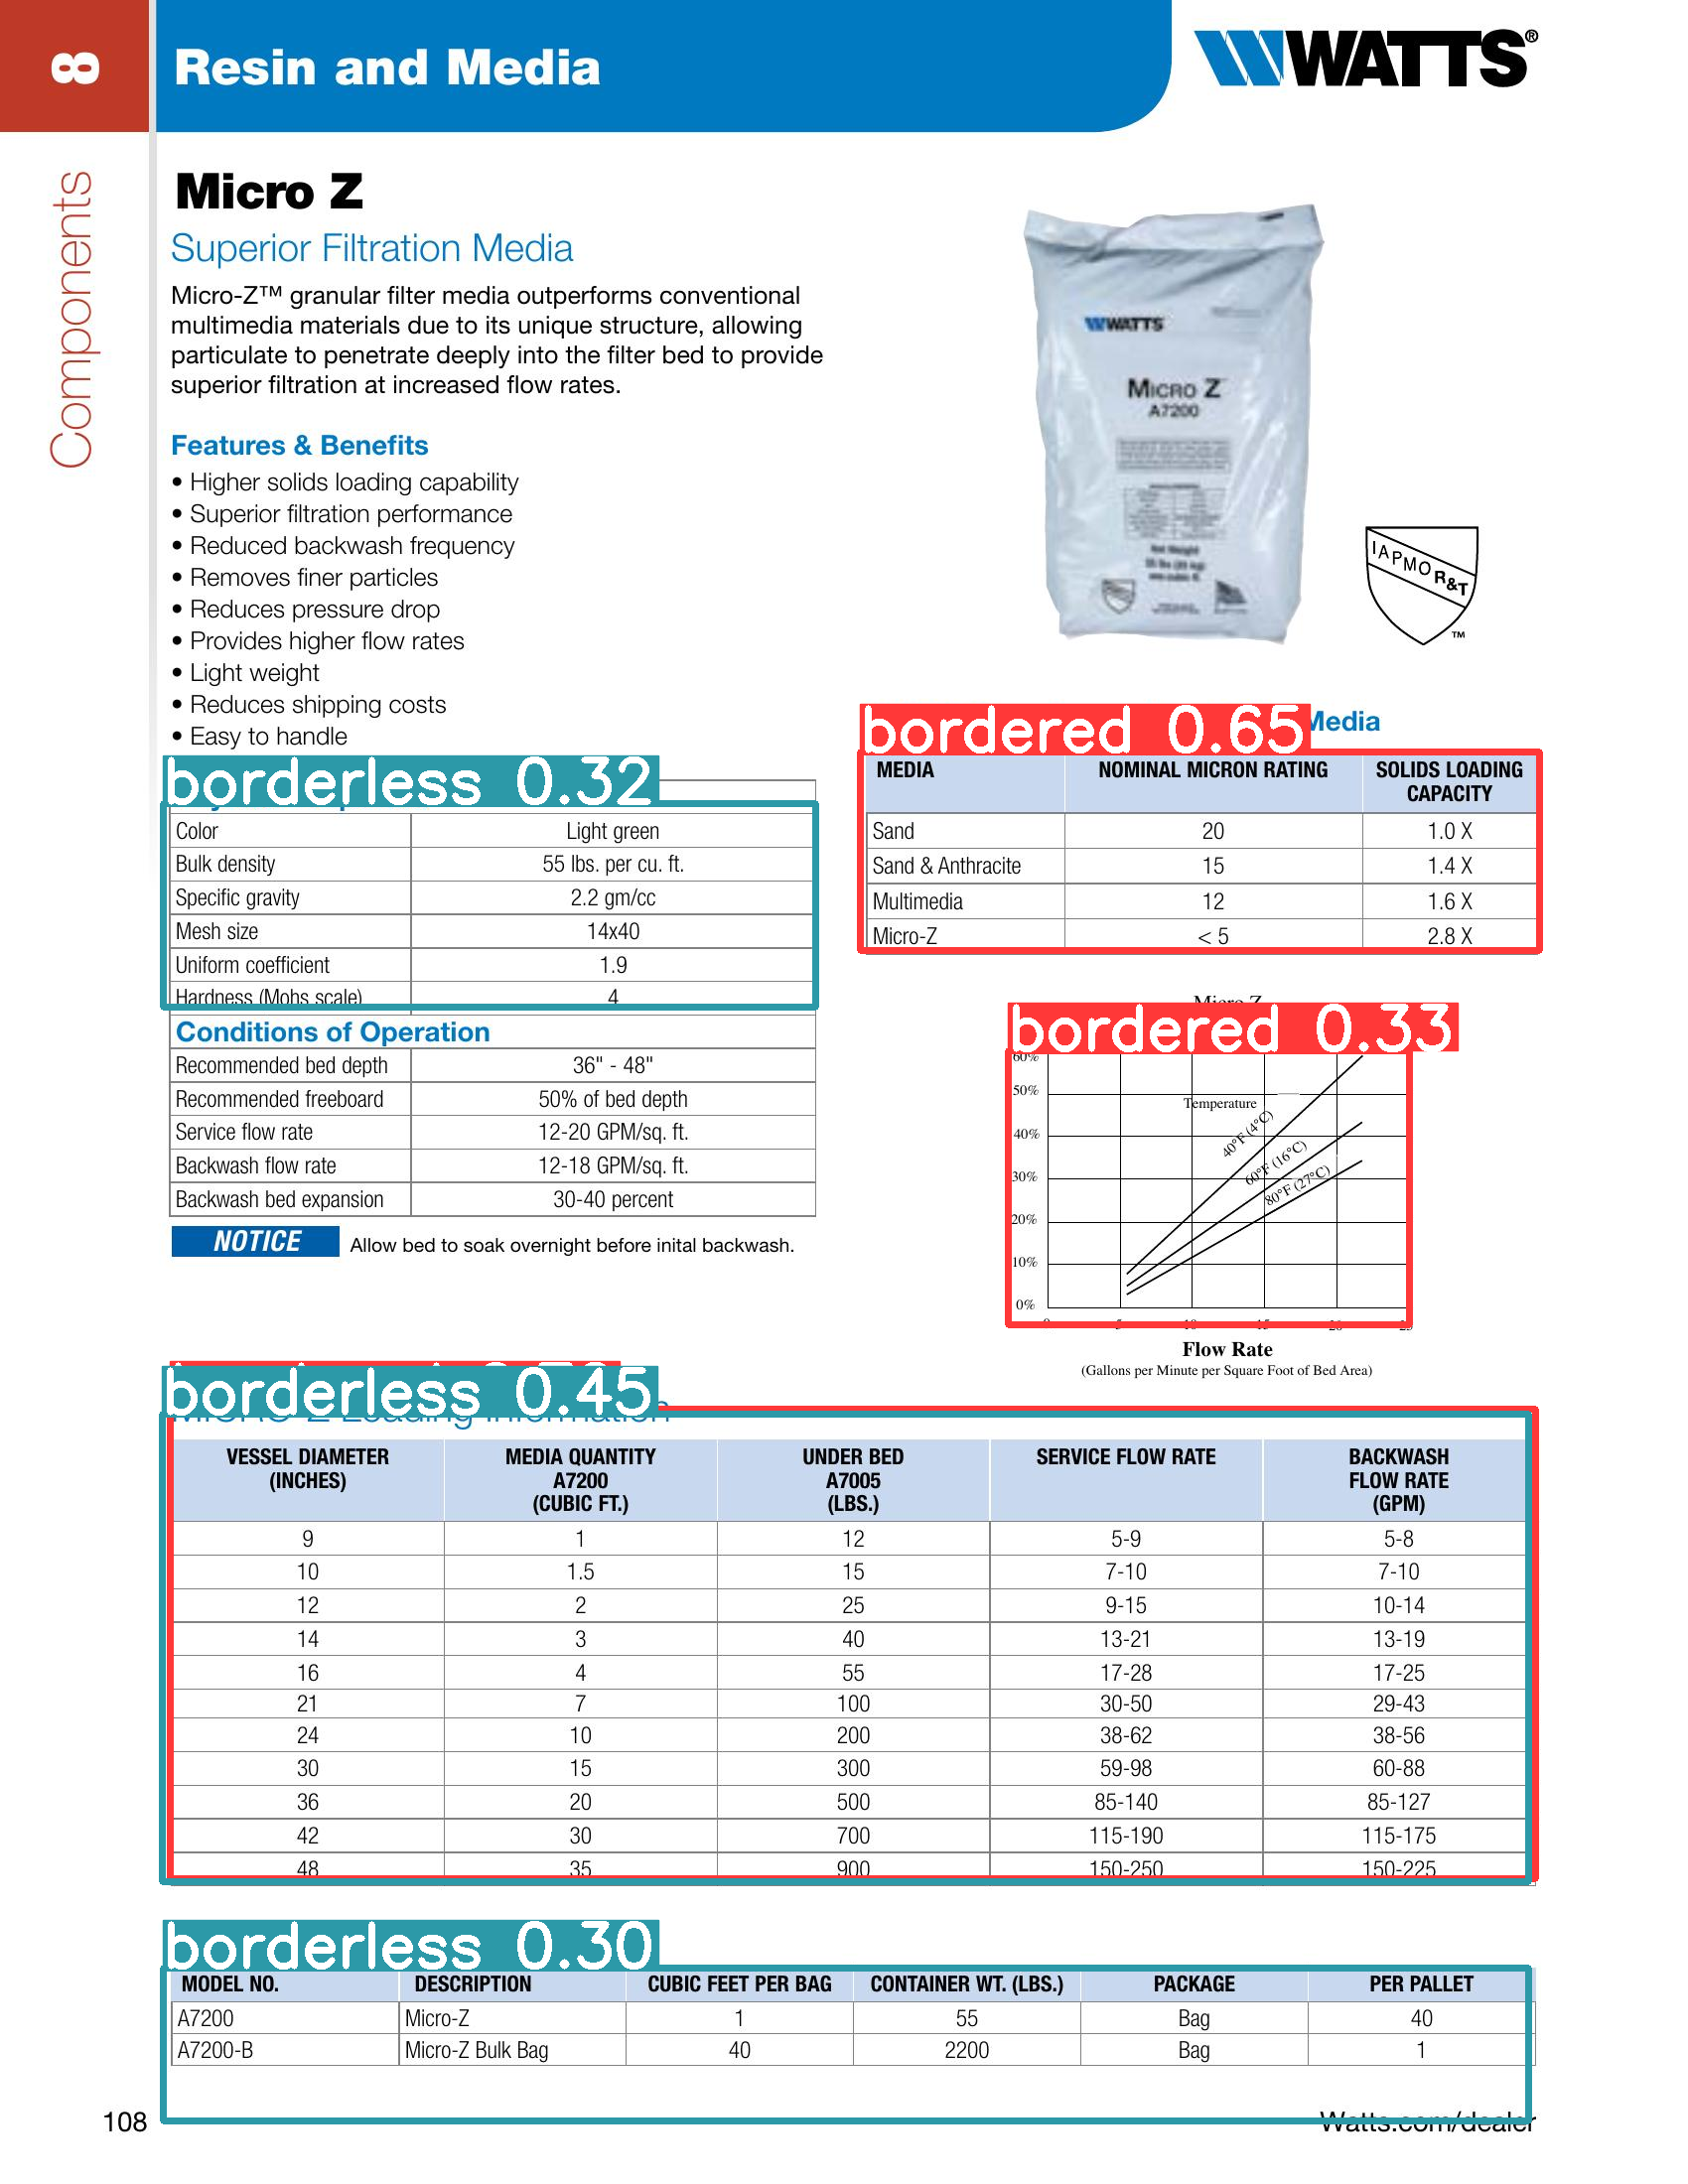

In [ ]:
render[11]